In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [8]:
df = pd.read_csv('Algeria_cleaned.csv')
df.drop(['day','month','year'],axis=1,inplace=True)


In [10]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
# dividing feaures
X = df.drop('FWI',axis=1)
y = df['FWI']

In [12]:
# train test splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

<Axes: >

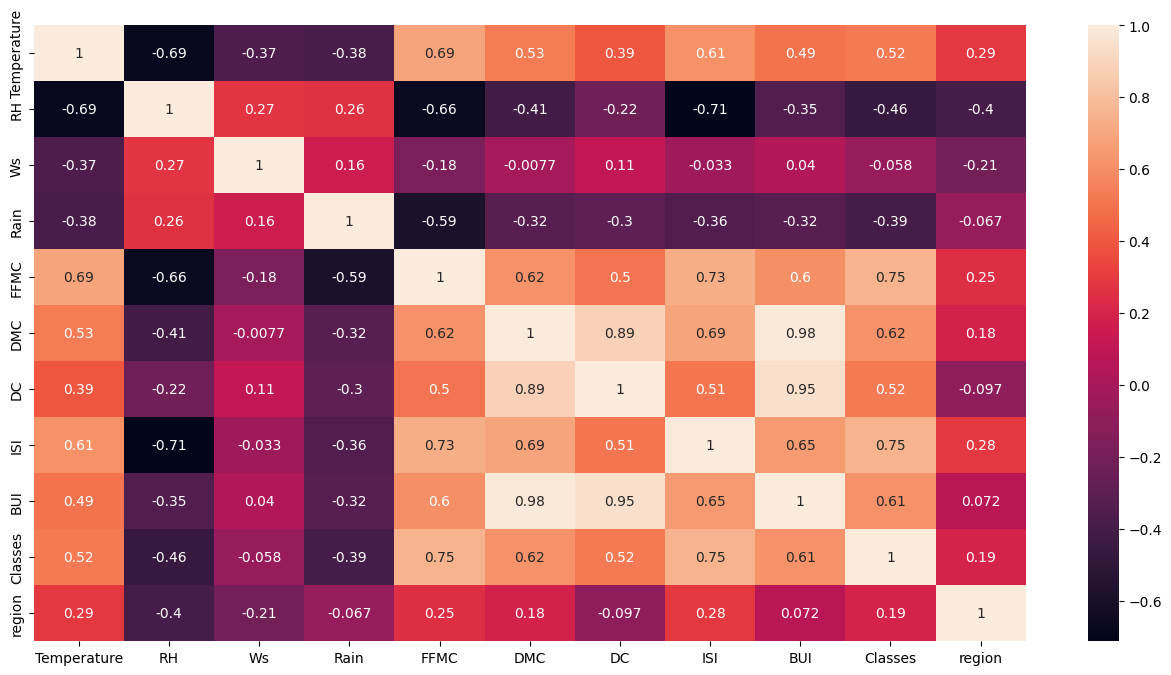

In [14]:
# feature selection based on correlation
plt.figure(figsize=(16,8))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [20]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range (i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr      


In [24]:
drop_feats=correlation(X_train,0.85)

In [25]:
# drop these features when corr is more than 85 percent
X_train.drop(drop_feats,axis=1,inplace=True)
X_test.drop(drop_feats,axis=1,inplace=True)


In [26]:
# feature scaling or standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

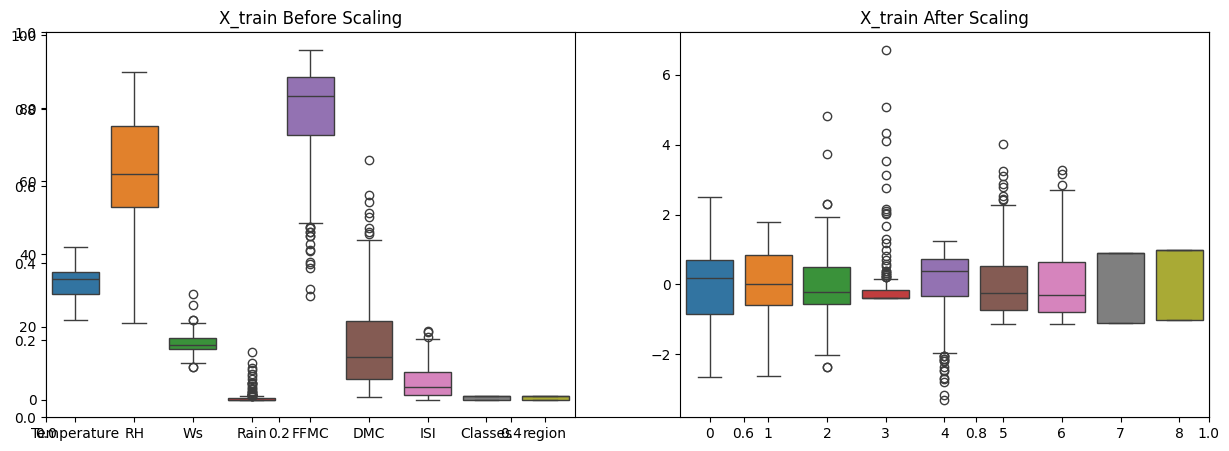

In [27]:

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

mean squared error : 0.8089636031872933
 r sqaured 0.9809440942971058


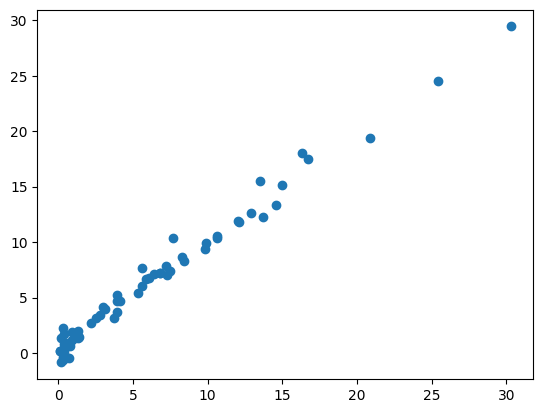

In [29]:
# model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("mean squared error :",mse)
print(" r sqaured",score)

plt.scatter(y_test,y_pred)


mean squared error : 1.9315417222522893
 r sqaured 0.9545007009271791


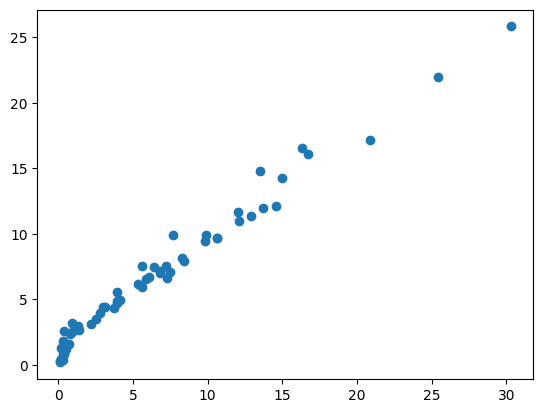

In [30]:
# lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error
lass = Lasso()
lass.fit(X_train_scaled,y_train)
y_pred = lass.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("mean squared error :",mse)
print(" r sqaured",score)

plt.scatter(y_test,y_pred)


In [32]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [34]:
lassocv.alpha_
lassocv.mse_path_

array([[95.63867082, 64.26163746, 39.59250755, 46.61448577, 43.68817018],
       [95.63867082, 60.72446235, 34.77095558, 41.05185425, 38.67882725],
       [90.58224933, 53.2685457 , 30.26922917, 36.0083296 , 33.81715198],
       [82.54077861, 46.77239113, 26.26917869, 31.495151  , 29.49399501],
       [75.43183993, 41.11179314, 22.80606934, 27.6103617 , 25.73497026],
       [69.1417124 , 36.17855887, 19.80880647, 24.26914261, 22.46644239],
       [63.57096563, 31.87870196, 17.21559049, 21.39848202, 19.62446435],
       [58.63263345, 28.13030048, 14.97312239, 18.93455522, 17.15329103],
       [54.25062331, 24.86210675, 13.03472072, 16.8221722 , 15.00483634],
       [50.11008093, 22.01209128, 11.35997283, 15.01348069, 13.13688583],
       [44.43740079, 19.52634271,  9.91378439, 13.46676156, 11.51285861],
       [39.46606126, 17.35785539,  8.6655828 , 12.14656327, 10.10094157],
       [35.10711232, 15.46574446,  7.5891295 , 11.02148218,  8.87346815],
       [31.28315711, 13.8144208 ,  6.6

mean squared error : 0.8089636031872933
 r sqaured 0.9809440942971058


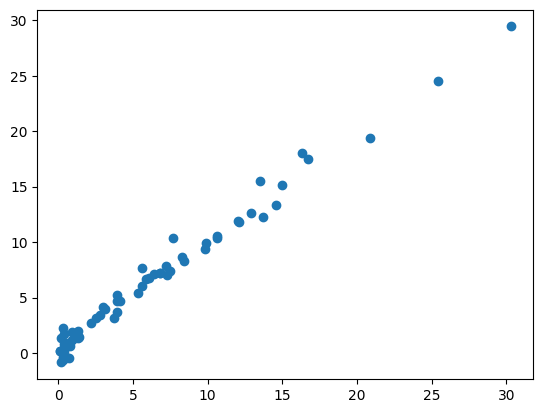

In [31]:
# ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
ridg = LinearRegression()
ridg.fit(X_train_scaled,y_train)
y_pred = ridg.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("mean squared error :",mse)
print(" r sqaured",score)

plt.scatter(y_test,y_pred)